In [139]:
#PdM

In [140]:
import pandas as pd

telemetry = pd.read_csv(r"C:\Users\andre\Desktop\Tutto Cavalieri\Predictive maintenance Microsoft\PdM_telemetry.csv")
errors = pd.read_csv(r"C:\Users\andre\Desktop\Tutto Cavalieri\Predictive maintenance Microsoft\PdM_errors.csv")
maint = pd.read_csv(r"C:\Users\andre\Desktop\Tutto Cavalieri\Predictive maintenance Microsoft\PdM_maint.csv")
failures = pd.read_csv(r"C:\Users\andre\Desktop\Tutto Cavalieri\Predictive maintenance Microsoft\PdM_failures.csv")
machines = pd.read_csv(r"C:\Users\andre\Desktop\Tutto Cavalieri\Predictive maintenance Microsoft\PdM_machines.csv")

In [141]:
# format datetime field which comes in as string
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")

print("Total number of telemetry records: %d" % len(telemetry.index))
print(telemetry.head())
telemetry.describe()

Total number of telemetry records: 876100
             datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration  
0  45.087686  
1  43.413973  
2  34.178847  
3  41.122144  
4  25.990511  


,datetime,machineID,volt,rotate,pressure,vibration
count,876100,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,2015-07-02 18:00:00,50.500000,170.777736,446.605119,100.858668,40.385007
min,2015-01-01 06:00:00,1.000000,97.333604,138.432075,51.237106,14.877054
25%,2015-04-02 12:00:00,25.750000,160.304927,412.305714,93.498181,36.777299
50%,2015-07-02 18:00:00,50.500000,170.607338,447.558150,100.425559,40.237247
75%,2015-10-02 00:00:00,75.250000,181.004493,482.176600,107.555231,43.784938
max,2016-01-01 06:00:00,100.000000,255.124717,695.020984,185.951998,76.791072
std,NaN,28.866087,15.509114,52.673886,11.048679,5.370361


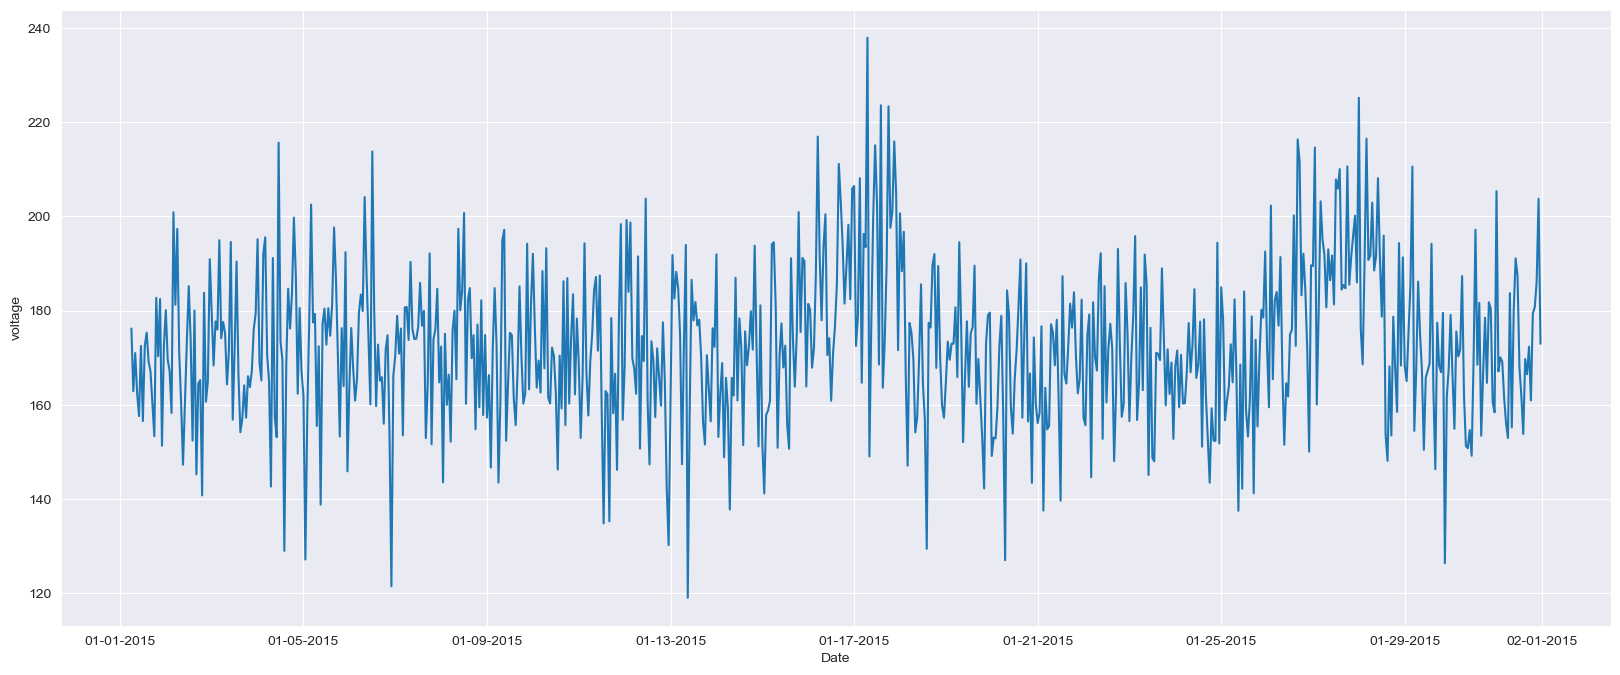

In [142]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = telemetry.loc[(telemetry['machineID'] == 1) & 
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) & 
                        (telemetry['datetime'] <pd.to_datetime('2015-02-01')),
                        ['datetime','volt']]
sns.set_style("darkgrid")
plt.figure(figsize=(20, 8))
plt.plot(plot_df['datetime'], plot_df['volt'])
plt.ylabel('voltage')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
adf.scaled[1.0] = '%m-%d-%Y'
plt.xlabel('Date')
plt.show()

In [143]:
# format of datetime field which comes in as string
errors['datetime'] = pd.to_datetime(errors['datetime'],format = '%Y-%m-%d %H:%M:%S')
errors['errorID'] = errors['errorID'].astype('category')
print("Total Number of error records: %d" %len(errors.index))
errors.head()

Total Number of error records: 3919


,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


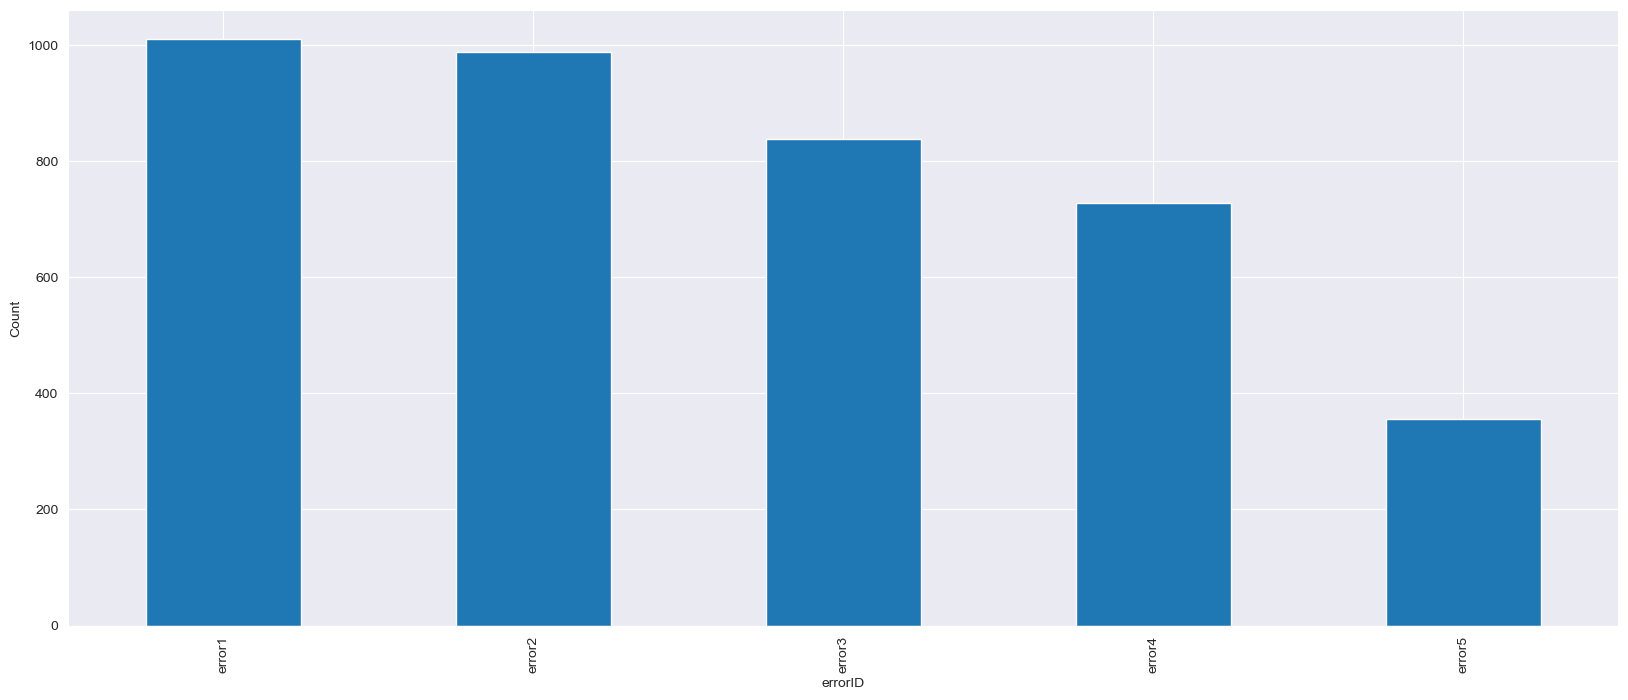

In [144]:
sns.set_style("darkgrid")
plt.figure(figsize=(20, 8))
errors['errorID'].value_counts().plot(kind='bar')
plt.ylabel('Count')
errors['errorID'].value_counts()
plt.show()

In [145]:
maint['datetime'] = pd.to_datetime(maint['datetime'], format='%Y-%m-%d %H:%M:%S')
maint['comp'] = maint['comp'].astype('category')
print("Total Number of maintenance Records: %d" %len(maint.index))
maint.head()

Total Number of maintenance Records: 3286


,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


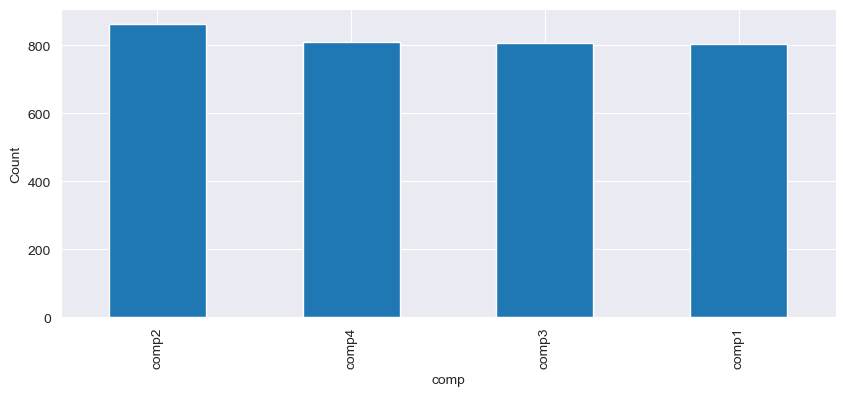

In [146]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 4))
maint['comp'].value_counts().plot(kind='bar')
plt.ylabel('Count')
maint['comp'].value_counts()
plt.show()

In [147]:
machines['model'] = machines['model'].astype('category')

print("Total number of machines: %d" % len(machines.index))
machines.head()

Total number of machines: 100


,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


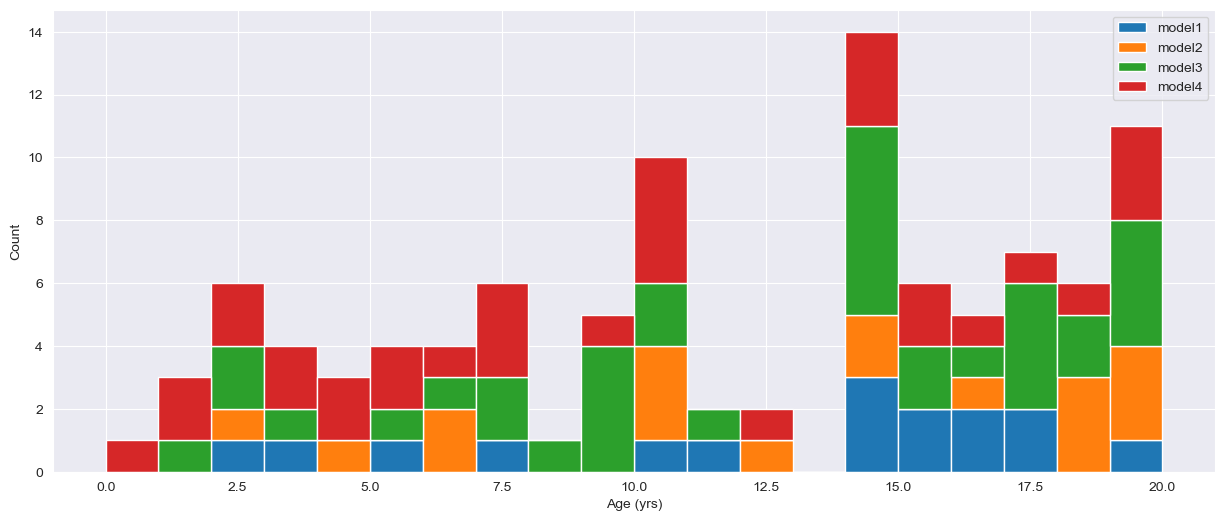

In [148]:
sns.set_style("darkgrid")
plt.figure(figsize=(15, 6))
_, bins, _ = plt.hist([machines.loc[machines['model'] == 'model1', 'age'],
                       machines.loc[machines['model'] == 'model2', 'age'],
                       machines.loc[machines['model'] == 'model3', 'age'],
                       machines.loc[machines['model'] == 'model4', 'age']],
                       20, stacked=True, label=['model1', 'model2', 'model3', 'model4'])
plt.xlabel('Age (yrs)')
plt.ylabel('Count')
plt.legend()
plt.show()

In [149]:
# format datetime field which comes in as string
failures['datetime'] = pd.to_datetime(failures['datetime'], format="%Y-%m-%d %H:%M:%S")
failures['failure'] = failures['failure'].astype('category')

print("Total number of failures: %d" % len(failures.index))
failures.head()

Total number of failures: 761


,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


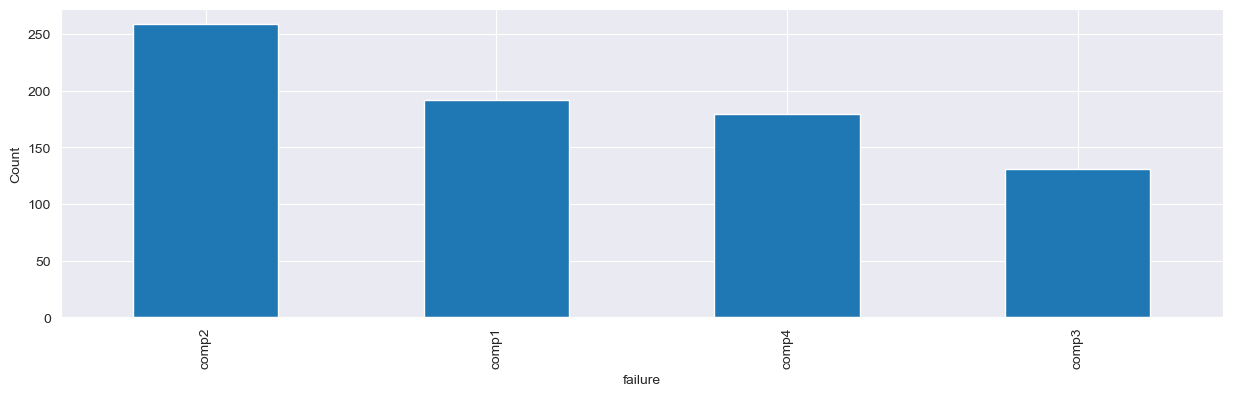

In [150]:
sns.set_style("darkgrid")
plt.figure(figsize=(15, 4))
failures['failure'].value_counts().plot(kind='bar')
plt.ylabel('Count')
failures['failure'].value_counts()
plt.show()

In [151]:
telemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [152]:
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']

for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col)
                .rolling(window=3).mean()  # time window  3h, mean
                .resample('3h', closed='left', label='right').first() # first value
                .unstack())

telemetry_mean_3h = pd.concat(temp, axis=1)
telemetry_mean_3h.columns = [i + 'mean_3h' for i in fields]
telemetry_mean_3h.reset_index(inplace=True)

# Remove rows with NaN (first 3h)
telemetry_mean_3h = telemetry_mean_3h.dropna()

temp = []
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col)
                .rolling(window=3).std()  # time window 3h, standard deviation
                .resample('3h', closed='left', label='right').first()
                .unstack())

telemetry_sd_3h = pd.concat(temp, axis=1)
telemetry_sd_3h.columns = [i + 'sd_3h' for i in fields]
telemetry_sd_3h.reset_index(inplace=True)

# Remove rows with NaN (first 3h)
telemetry_sd_3h = telemetry_sd_3h.dropna()
telemetry_sd_3h.head()

,machineID,datetime,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h
0,1,2015-01-01 09:00:00,6.721032,67.849599,18.934956,5.874970
1,1,2015-01-01 12:00:00,4.807415,92.702671,17.106476,4.808836
2,1,2015-01-01 15:00:00,8.919370,38.316408,9.176711,8.414362
3,1,2015-01-01 18:00:00,3.056496,33.200513,4.843754,5.011355
4,1,2015-01-01 21:00:00,6.853823,54.501054,8.931082,2.889493


In [153]:
telemetry_mean_3h.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502
1,1,2015-01-01 12:00:00,165.443986,425.415550,93.315664,39.571655
2,1,2015-01-01 15:00:00,162.223630,454.923953,106.523125,34.799816
3,1,2015-01-01 18:00:00,172.355243,423.041389,105.491224,40.288677
4,1,2015-01-01 21:00:00,160.226142,440.413573,95.424693,41.776012


In [154]:
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']

for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col)
                .rolling(window=24).mean()  # time windows 24h, mean
                .resample('3h', closed='left', label='right').first()  # first value
                .unstack())

telemetry_mean_24h = pd.concat(temp, axis=1)
telemetry_mean_24h.columns = [i + 'mean_24h' for i in fields]
telemetry_mean_24h.reset_index(inplace=True)

# Remove rows with NaN (first 24h)
telemetry_mean_24h = telemetry_mean_24h.dropna()

temp = []
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col)
                .rolling(window=24).std()  # time window 24 h, standard deviation
                .resample('3h', closed='left', label='right').first()
                .unstack())

telemetry_sd_24h = pd.concat(temp, axis=1)
telemetry_sd_24h.columns = [i + 'sd_24h' for i in fields]
telemetry_sd_24h.reset_index(inplace=True)

# Rimuove righe con valori NaN (prime 24 ore)
telemetry_sd_24h = telemetry_sd_24h.dropna()
telemetry_sd_24h.head()

,machineID,datetime,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
7,1,2015-01-02 06:00:00,11.233120,48.717395,10.079880,5.853209
8,1,2015-01-02 09:00:00,12.519402,48.385076,10.171540,6.163231
9,1,2015-01-02 12:00:00,13.370357,42.432317,9.471669,6.195076
10,1,2015-01-02 15:00:00,13.299281,41.346121,8.731229,5.687944
11,1,2015-01-02 18:00:00,13.954518,43.490234,8.061653,5.898069


In [155]:
merged_3h = pd.concat([telemetry_mean_3h, telemetry_sd_3h.iloc[:, 2:]], axis=1)
merged_24h = pd.concat([telemetry_mean_24h, telemetry_sd_24h.iloc[:,2:]], axis=1)
telemetry_feat = pd.merge(merged_3h, merged_24h, on=['datetime', 'machineID'], how='left')
telemetry_feat = telemetry_feat.dropna()

In [156]:
#telemetry_feat.describe()
telemetry_feat.head(20)

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
7,1,2015-01-02 06:00:00,165.002124,456.438211,87.673270,41.527048,5.959072,54.613403,7.623486,2.704438,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209
8,1,2015-01-02 09:00:00,193.164359,448.652619,101.438946,38.133459,10.459846,46.294659,11.281152,12.407322,170.614862,446.364859,96.849785,39.736826,12.519402,48.385076,10.171540,6.163231
9,1,2015-01-02 12:00:00,159.676811,430.571937,100.242184,37.664039,11.972868,51.632304,12.041639,4.682870,169.893965,447.009407,97.715600,39.498374,13.370357,42.432317,9.471669,6.195076
10,1,2015-01-02 15:00:00,173.019460,432.717201,98.126809,40.647784,12.377689,17.368725,7.650921,6.248584,171.243444,444.233563,96.666060,40.229370,13.299281,41.346121,8.731229,5.687944
11,1,2015-01-02 18:00:00,168.747581,456.696379,98.297446,38.895426,14.479508,62.025493,4.085463,7.128157,170.792486,448.440437,95.766838,40.055214,13.954518,43.490234,8.061653,5.898069
12,1,2015-01-02 21:00:00,158.339642,471.026837,113.816872,41.600280,11.343408,40.271733,12.370523,3.896469,170.556674,452.267095,98.065860,40.033247,14.402740,42.626186,10.408012,5.941890
13,1,2015-01-03 00:00:00,161.744699,430.977304,100.487190,35.004573,21.532893,16.196129,14.506133,3.355500,168.460525,451.031783,99.273286,38.903462,15.513819,40.395881,10.833294,5.737671
14,1,2015-01-03 03:00:00,178.488928,452.939230,91.964851,41.645193,13.001405,44.300607,15.757636,1.038881,169.772951,447.502464,99.005946,39.389725,15.726970,39.648116,11.904700,5.601191
15,1,2015-01-03 06:00:00,174.023014,507.335270,102.644437,35.979045,4.967382,16.162804,10.882799,0.464339,170.900562,453.864597,100.877342,38.696225,15.635083,41.828592,11.326412,5.583521
16,1,2015-01-03 09:00:00,182.225112,456.016419,94.824748,44.161530,11.148588,35.369017,2.538375,10.658805,169.533156,454.785072,100.050567,39.449734,13.995465,40.843882,11.036546,5.561553


In [157]:
#ERRORS
# create a column for each error type
error_count = pd.get_dummies(errors.set_index('datetime')).reset_index()
error_count
error_count.columns = ['datetime', 'machineID', 'error1', 'error2', 'error3', 'error4', 'error5']
error_count.head()

,datetime,machineID,error1,error2,error3,error4,error5
0,2015-01-03 07:00:00,1,True,False,False,False,False
1,2015-01-03 20:00:00,1,False,False,True,False,False
2,2015-01-04 06:00:00,1,False,False,False,False,True
3,2015-01-10 15:00:00,1,False,False,False,True,False
4,2015-01-22 10:00:00,1,False,False,False,True,False


In [158]:
# combine errors for a given machine in a given hour
error_count = error_count.groupby(['machineID','datetime']).sum().reset_index()
error_count.head()

,machineID,datetime,error1,error2,error3,error4,error5
0,1,2015-01-03 07:00:00,1,0,0,0,0
1,1,2015-01-03 20:00:00,0,0,1,0,0
2,1,2015-01-04 06:00:00,0,0,0,0,1
3,1,2015-01-10 15:00:00,0,0,0,1,0
4,1,2015-01-22 10:00:00,0,0,0,1,0


In [159]:
error_count = telemetry[['datetime', 'machineID']].merge(error_count, on=['machineID', 'datetime'], how='left').fillna(0.0)
error_count.head()

,datetime,machineID,error1,error2,error3,error4,error5
0,2015-01-01 06:00:00,1,0.0,0.0,0.0,0.0,0.0
1,2015-01-01 07:00:00,1,0.0,0.0,0.0,0.0,0.0
2,2015-01-01 08:00:00,1,0.0,0.0,0.0,0.0,0.0
3,2015-01-01 09:00:00,1,0.0,0.0,0.0,0.0,0.0
4,2015-01-01 10:00:00,1,0.0,0.0,0.0,0.0,0.0


In [160]:
temp = []
fields = ['error%d' % i for i in range(1, 6)]
for col in fields:
    temp.append(pd.pivot_table(error_count,
                               index='datetime',
                               columns='machineID',
                               values=col)
                .rolling(window=24).sum()  # Rolling sum con la finestra di 24 ore
                .resample('3h', closed='left', label='right')
                .first()  # Prendi il primo valore ogni 3 ore
                .unstack())

error_count = pd.concat(temp, axis=1)
error_count.columns = [i + 'count' for i in fields]
error_count.reset_index(inplace=True)
error_count = error_count.dropna()
error_count.head()

,machineID,datetime,error1count,error2count,error3count,error4count,error5count
7,1,2015-01-02 06:00:00,0.0,0.0,0.0,0.0,0.0
8,1,2015-01-02 09:00:00,0.0,0.0,0.0,0.0,0.0
9,1,2015-01-02 12:00:00,0.0,0.0,0.0,0.0,0.0
10,1,2015-01-02 15:00:00,0.0,0.0,0.0,0.0,0.0
11,1,2015-01-02 18:00:00,0.0,0.0,0.0,0.0,0.0


In [161]:
error_count.head()

,machineID,datetime,error1count,error2count,error3count,error4count,error5count
7,1,2015-01-02 06:00:00,0.0,0.0,0.0,0.0,0.0
8,1,2015-01-02 09:00:00,0.0,0.0,0.0,0.0,0.0
9,1,2015-01-02 12:00:00,0.0,0.0,0.0,0.0,0.0
10,1,2015-01-02 15:00:00,0.0,0.0,0.0,0.0,0.0
11,1,2015-01-02 18:00:00,0.0,0.0,0.0,0.0,0.0


In [162]:
import numpy as np
import pandas as pd

# create a column for each error type
comp_rep = pd.get_dummies(maint.set_index('datetime')).reset_index()
comp_rep.columns = ['datetime', 'machineID', 'sincelastcomp1', 'sincelastcomp2', 'sincelastcomp3', 'sincelastcomp4']

# combine repairs for a given machine in a given hour
comp_rep = comp_rep.groupby(['machineID', 'datetime']).sum().reset_index()

# add timepoints where no components were replaced
comp_rep = telemetry[['datetime', 'machineID']].merge(comp_rep,
                                                      on=['datetime', 'machineID'],
                                                      how='outer').fillna(0).sort_values(by=['machineID', 'datetime'])

components = ['sincelastcomp1', 'sincelastcomp2', 'sincelastcomp3', 'sincelastcomp4']
for comp in components:
    # convert indicator to most recent date of component change
    comp_rep.loc[comp_rep[comp] < 1, comp] = None
    comp_rep[comp] = pd.to_datetime(comp_rep[comp])  #  Converte in datetime
    comp_rep.loc[~comp_rep[comp].isnull(), comp] = comp_rep.loc[~comp_rep[comp].isnull(), 'datetime']
    
    # forward-fill the most-recent date of component change
    comp_rep[comp] = comp_rep[comp].ffill()  # Usa ffill() invece di fillna(method='ffill')

# remove dates in 2014 (may have NaN or future component change dates)    
comp_rep = comp_rep.loc[comp_rep['datetime'] > pd.to_datetime('2015-01-01')]

# replace dates of most recent component change with days since most recent component change
for comp in components:
    comp_rep[comp] = (comp_rep['datetime'] - comp_rep[comp]).dt.total_seconds() / 86400  # Converti timedelta in giorni

comp_rep.head()


,datetime,machineID,sincelastcomp1,sincelastcomp2,sincelastcomp3,sincelastcomp4
365,2015-01-01 06:00:00,1,19.000000,214.000000,154.000000,169.000000
465,2015-01-01 07:00:00,1,19.041667,214.041667,154.041667,169.041667
565,2015-01-01 08:00:00,1,19.083333,214.083333,154.083333,169.083333
665,2015-01-01 09:00:00,1,19.125000,214.125000,154.125000,169.125000
765,2015-01-01 10:00:00,1,19.166667,214.166667,154.166667,169.166667


In [163]:
#Left joins to merge all datsasets
final_feat = telemetry_feat.merge(error_count, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(comp_rep, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(machines, on=['machineID'], how='left')

final_feat.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error2count,error3count,error4count,error5count,sincelastcomp1,sincelastcomp2,sincelastcomp3,sincelastcomp4,model,age
0,1,2015-01-02 06:00:00,165.002124,456.438211,87.673270,41.527048,5.959072,54.613403,7.623486,2.704438,...,0.0,0.0,0.0,0.0,20.000,215.000,155.000,170.000,model3,18
1,1,2015-01-02 09:00:00,193.164359,448.652619,101.438946,38.133459,10.459846,46.294659,11.281152,12.407322,...,0.0,0.0,0.0,0.0,20.125,215.125,155.125,170.125,model3,18
2,1,2015-01-02 12:00:00,159.676811,430.571937,100.242184,37.664039,11.972868,51.632304,12.041639,4.682870,...,0.0,0.0,0.0,0.0,20.250,215.250,155.250,170.250,model3,18
3,1,2015-01-02 15:00:00,173.019460,432.717201,98.126809,40.647784,12.377689,17.368725,7.650921,6.248584,...,0.0,0.0,0.0,0.0,20.375,215.375,155.375,170.375,model3,18
4,1,2015-01-02 18:00:00,168.747581,456.696379,98.297446,38.895426,14.479508,62.025493,4.085463,7.128157,...,0.0,0.0,0.0,0.0,20.500,215.500,155.500,170.500,model3,18


In [164]:
# Merge finalfeat con failures sulla colonna 'machineID'
labeled = final_feat.merge(failures, on='machineID', how='left')

# Calcola la differenza di tempo tra le colonne datetime.y e datetime.x
labeled['datediff'] = (labeled['datetime_y'] - labeled['datetime_x']).dt.total_seconds() / 3600

# Filtra i dati per considerare solo differenze temporali tra 0 e 24 ore
labeled = labeled[(labeled['datediff'] <= 24) & (labeled['datediff'] >= 0)]

# Merge con finalfeat per aggiungere le informazioni di failure
labeledfeatures = final_feat.merge(
    labeled[['datetime_x', 'machineID', 'failure']],
    left_on=['datetime', 'machineID'],
    right_on=['datetime_x', 'machineID'],
    how='left'
).sort_values(by=['machineID', 'datetime'])


# Aggiungi 'none' alle categorie esistenti della colonna 'failure'
labeledfeatures['failure'] = labeledfeatures['failure'].astype('category')
labeledfeatures['failure'] = labeledfeatures['failure'].cat.add_categories('none')

# Sostituisci i valori NaN in 'failure' con 'none'
labeledfeatures['failure'] = labeledfeatures['failure'].fillna('none')
del labeledfeatures['datetime_x']


# Visualizza i risultati
labeledfeatures

# Merge final_feat with failures on the 'machineID' column
labeled = final_feat.merge(failures, on='machineID', how='left')

# Calculate the time difference between columns datetime.y and datetime.x
labeled['datediff'] = (labeled['datetime_y'] - labeled['datetime_x']).dt.total_seconds() / 3600

# Filter data to only include time differences between 0 and 24 hours
labeled = labeled[(labeled['datediff'] <= 24) & (labeled['datediff'] >= 0)]

# Merge with final_feat to add failure information
labeledfeatures = final_feat.merge(
    labeled[['datetime_x', 'machineID', 'failure']],
    left_on=['datetime', 'machineID'],
    right_on=['datetime_x', 'machineID'],
    how='left'
).sort_values(by=['machineID', 'datetime'])

# Add 'none' to the existing categories of the 'failure' column
labeledfeatures['failure'] = labeledfeatures['failure'].astype('category')
labeledfeatures['failure'] = labeledfeatures['failure'].cat.add_categories('none')

# Replace NaN values in 'failure' with 'none'
labeledfeatures['failure'] = labeledfeatures['failure'].fillna('none')
del labeledfeatures['datetime_x']

# Display the results
labeledfeatures


,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error3count,error4count,error5count,sincelastcomp1,sincelastcomp2,sincelastcomp3,sincelastcomp4,model,age,failure
0,1,2015-01-02 06:00:00,165.002124,456.438211,87.673270,41.527048,5.959072,54.613403,7.623486,2.704438,...,0.0,0.0,0.0,20.000,215.000,155.000,170.000,model3,18,none
1,1,2015-01-02 09:00:00,193.164359,448.652619,101.438946,38.133459,10.459846,46.294659,11.281152,12.407322,...,0.0,0.0,0.0,20.125,215.125,155.125,170.125,model3,18,none
2,1,2015-01-02 12:00:00,159.676811,430.571937,100.242184,37.664039,11.972868,51.632304,12.041639,4.682870,...,0.0,0.0,0.0,20.250,215.250,155.250,170.250,model3,18,none
3,1,2015-01-02 15:00:00,173.019460,432.717201,98.126809,40.647784,12.377689,17.368725,7.650921,6.248584,...,0.0,0.0,0.0,20.375,215.375,155.375,170.375,model3,18,none
4,1,2015-01-02 18:00:00,168.747581,456.696379,98.297446,38.895426,14.479508,62.025493,4.085463,7.128157,...,0.0,0.0,0.0,20.500,215.500,155.500,170.500,model3,18,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291764,100,2015-12-31 21:00:00,184.227378,448.912608,102.844531,40.035249,17.142785,88.867750,3.042814,8.398433,...,0.0,0.0,0.0,82.625,7.625,82.625,52.625,model4,5,none
291765,100,2016-01-01 00:00:00,151.569525,488.417420,97.080984,33.330334,12.249429,68.804866,16.565632,5.275556,...,0.0,0.0,0.0,82.750,7.750,82.750,52.750,model4,5,none
291766,100,2016-01-01 03:00:00,163.439806,466.546771,109.397201,43.317103,9.755055,70.100423,7.300565,4.333373,...,0.0,0.0,0.0,82.875,7.875,82.875,52.875,model4,5,none
291767,100,2016-01-01 06:00:00,177.266129,440.894903,100.687019,43.425922,13.568463,43.260932,2.198731,7.868190,...,0.0,0.0,0.0,83.000,8.000,83.000,53.000,model4,5,none


In [166]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Check if the 'datetime' column is in the correct format
labeledfeatures.dropna(inplace=True)
#labeledfeatures['datetime'] = pd.to_datetime(labeledfeatures['datetime'])
labeledfeatures.loc[:, 'datetime'] = pd.to_datetime(labeledfeatures['datetime'])

# Initialize the encoder
le = LabelEncoder()

# Apply the encoder to the 'failure' column (target variable)
#labeledfeatures['failure'] = le.fit_transform(labeledfeatures['failure'])
labeledfeatures.loc[:, 'failure'] = le.fit_transform(labeledfeatures['failure'])
#labeledfeatures['model'] = le.fit_transform(labeledfeatures['model'])
labeledfeatures.loc[:, 'model'] = le.fit_transform(labeledfeatures['model'])

# Split into training and test data as in the R code
traindata1 = labeledfeatures[labeledfeatures['datetime'] < '2015-07-31 01:00:00']
testdata1 = labeledfeatures[labeledfeatures['datetime'] > '2015-08-01 01:00:00']

traindata2 = labeledfeatures[labeledfeatures['datetime'] < '2015-08-31 01:00:00']
testdata2 = labeledfeatures[labeledfeatures['datetime'] > '2015-09-01 01:00:00']

traindata3 = labeledfeatures[labeledfeatures['datetime'] < '2015-09-30 01:00:00']
testdata3 = labeledfeatures[labeledfeatures['datetime'] > '2015-10-01 01:00:00']

# Define the features for the model
features = labeledfeatures.columns[2:30]  # Adjust this range based on your columns

# Function to train and make predictions with GradientBoostingClassifier
def train_and_predict(train_data, test_data):
    X_train = train_data[features]
    y_train = train_data['failure']
    X_test = test_data[features]
    y_test = test_data['failure']
    
    model = GradientBoostingClassifier(n_estimators=50, max_depth=5, learning_rate=0.1, random_state=1234)
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return model, y_pred, accuracy

# Train the model and make predictions for the different datasets
model1, pred_gbm1, accuracy1 = train_and_predict(traindata1, testdata1)
model2, pred_gbm2, accuracy2 = train_and_predict(traindata2, testdata2)
model3, pred_gbm3, accuracy3 = train_and_predict(traindata3, testdata3)

In [167]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score, cohen_kappa_score
def evaluate(actual, predicted):
    # Remove any NaN values
    actual = np.array(actual)
    predicted = np.array(predicted)
    mask = ~np.isnan(actual) & ~np.isnan(predicted)
    actual = actual[mask]
    predicted = predicted[mask]

    # Compute confusion matrix
    cm = confusion_matrix(actual, predicted)
    n = cm.sum()  # total number of instances
    nc = cm.shape[0]  # number of classes
    
    # Accuracy
    accuracy = accuracy_score(actual, predicted)
    
    # Precision, Recall, F1-score for each class
    precision, recall, f1, _ = precision_recall_fscore_support(actual, predicted, average=None, zero_division=0)
    
    # Macro-averaged metrics
    macro_precision = np.mean(precision)
    macro_recall = np.mean(recall)
    macro_f1 = np.mean(f1)
    
    # Micro-averaged metrics
    micro_precision, micro_recall, micro_f1, _ = precision_recall_fscore_support(actual, predicted, average="micro")
    
    # Majority class metrics
    class_counts = np.bincount(actual)
    majority_class_index = np.argmax(class_counts)
    majority_class_accuracy = class_counts[majority_class_index] / n
    majority_class_precision = np.zeros(nc)
    majority_class_recall = np.zeros(nc)
    majority_class_f1 = np.zeros(nc)
    majority_class_precision[majority_class_index] = class_counts[majority_class_index] / n
    majority_class_recall[majority_class_index] = 1
    majority_class_f1[majority_class_index] = 2 * majority_class_precision[majority_class_index] / (majority_class_precision[majority_class_index] + 1)
    
    # Random guess metrics
    p = class_counts / n
    random_guess_accuracy = 1 / nc
    random_guess_precision = p
    random_guess_recall = np.full(nc, 1 / nc)
    random_guess_f1 = 2 * p / (nc * p + 1)
    
    # Random weighted guess
    rwg_accuracy = np.sum(p**2)
    rwg_precision = p
    rwg_recall = p
    rwg_f1 = p
    
    # Kappa statistic
    expected_accuracy = np.sum((cm.sum(axis=1) / n) * (cm.sum(axis=0) / n))
    kappa = (accuracy - expected_accuracy) / (1 - expected_accuracy)

    # Create DataFrame with the metrics
    metrics_df = pd.DataFrame({
        "Class": np.unique(actual),
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "MacroAvgPrecision": macro_precision,
        "MacroAvgRecall": macro_recall,
        "MacroAvgF1": macro_f1,
        "MicroAvgPrecision": micro_precision,
        "MicroAvgRecall": micro_recall,
        "MicroAvgF1": micro_f1,
        "MajorityClassAccuracy": majority_class_accuracy,
        "MajorityClassPrecision": majority_class_precision,
        "MajorityClassRecall": majority_class_recall,
        "MajorityClassF1": majority_class_f1,
        "Kappa": kappa,
        "RandomGuessAccuracy": random_guess_accuracy,
        "RandomGuessPrecision": random_guess_precision,
        "RandomGuessRecall": random_guess_recall,
        "RandomGuessF1": random_guess_f1,
        "RandomWeightedGuessAccuracy": rwg_accuracy,
        "RandomWeightedGuessPrecision": rwg_precision,
        "RandomWeightedGuessRecall": rwg_recall,
        "RandomWeightedGuessF1": rwg_f1
    })
    
    return {"ConfusionMatrix": cm, "Metrics": metrics_df}

# Example usage with the first model
pred_gbm1 = model1.predict(testdata1[features])  # Use your model to make predictions
eval1 = evaluate(actual=testdata1["failure"], predicted=pred_gbm1)

# Show the confusion matrix
print(eval1["ConfusionMatrix"])

# Show the metrics
print(eval1["Metrics"].T)

# Create the DataFrame with recall for all models
recall_df = pd.DataFrame({
    "failure": ["comp1", "comp2", "comp3", "comp4", "none"],
    "gbm_model1_Recall": eval1["Metrics"]["Recall"],
    #"gbm_model2_Recall": evaluate(actual=testdata2["failure"], predicted=model2.predict(testdata2[features]))["Metrics"]["Recall"],
    #"gbm_model3_Recall": evaluate(actual=testdata3["failure"], predicted=model3.predict(testdata3[features]))["Metrics"]["Recall"]
})

print(recall_df)


[[   594      0      0      0      0]
 [     0   1001      0      0      0]
 [     0      0    468      0      0]
 [     0      0      0    657      0]
 [     0      0      0      0 120051]]
                                     0         1         2         3         4
Class                         0.000000  1.000000  2.000000  3.000000  4.000000
Accuracy                      1.000000  1.000000  1.000000  1.000000  1.000000
Precision                     1.000000  1.000000  1.000000  1.000000  1.000000
Recall                        1.000000  1.000000  1.000000  1.000000  1.000000
F1                            1.000000  1.000000  1.000000  1.000000  1.000000
MacroAvgPrecision             1.000000  1.000000  1.000000  1.000000  1.000000
MacroAvgRecall                1.000000  1.000000  1.000000  1.000000  1.000000
MacroAvgF1                    1.000000  1.000000  1.000000  1.000000  1.000000
MicroAvgPrecision             1.000000  1.000000  1.000000  1.000000  1.000000
MicroAvgRecall     